# Import

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting filenames from the folders

In [2]:
os.chdir('/Users/banyaidora/Documents/Egyetem/3rd/Data Science Lab II./Data/PCM_data')
folders = os.listdir()
folders

['m1',
 '.DS_Store',
 '2020.05.02_M3_time_corrected',
 '2020.05.24_M1_time_corrected',
 '2020.04.09_time_corrected',
 '2020.05.24_M2_time_corrected',
 '2020.05.24_M3_time_corrected']

In [3]:
files = []
for folder in folders:
  os.chdir('/Users/banyaidora/Documents/Egyetem/3rd/Data Science Lab II./Data/PCM_data')
  if not folder.startswith('.'):
    os.chdir(os.getcwd() + '/' + folder)
    subfolders = os.listdir()
    for subfolder in subfolders:
      if not subfolder.startswith('.'):
        os.chdir(os.getcwd() + '/' + subfolder)
        files.append(os.listdir())
        os.chdir('/Users/banyaidora/Documents/Egyetem/3rd/Data Science Lab II./Data/PCM_data/' + folder)
files = [item for sublist in files for item in sublist] # since it is a list of lists
files

['200411-041053-34.pcm',
 '200411-041053-35.pcm',
 '200411-041053-37.pcm',
 '200411-041053-36.pcm',
 '200411-041053-26.pcm',
 '200411-041053-32.pcm',
 '200411-041053-33.pcm',
 '200411-041053-27.pcm',
 '200411-041053-31.pcm',
 '200411-041053-24.pcm',
 '200411-041053-30.pcm',
 '200411-041053-28.pcm',
 '200411-041053-38.pcm',
 '200411-041053-39.pcm',
 '200410-094338-28.pcm',
 '200410-094338-38.pcm',
 '200410-094338-39.pcm',
 '200410-094338-34.pcm',
 '200410-094338-35.pcm',
 '200410-094338-37.pcm',
 '200410-094338-36.pcm',
 '200410-094338-32.pcm',
 '200410-094338-26.pcm',
 '200410-094338-27.pcm',
 '200410-094338-33.pcm',
 '200410-094338-31.pcm',
 '200410-094338-30.pcm',
 '200410-094338-24.pcm',
 '200412-073041-37.pcm',
 '200412-073041-36.pcm',
 '200412-073041-34.pcm',
 '200412-073041-35.pcm',
 '200412-073041-31.pcm',
 '200412-073041-30.pcm',
 '200412-073041-24.pcm',
 '200412-073041-32.pcm',
 '200412-073041-26.pcm',
 '200412-073041-27.pcm',
 '200412-073041-33.pcm',
 '200412-073041-28.pcm',


### How many audio files we have?

In [4]:
len(files)

91094

# Exploration

In [5]:

file_names = pd.DataFrame(files, columns =['File'])

file_names['date'] = file_names.apply(lambda row : row.File.split('-')[0].replace('__', '').replace('000', '200'), axis = 1)
file_names['time'] = file_names.apply(lambda row : row.File.split('-')[1].replace('__', ''), axis = 1)
file_names['some_id'] = file_names.apply(lambda row : row.File.split('-')[2].replace('.pcm', ''), axis = 1)

file_names.head()

,File,date,time,some_id
0,200411-041053-34.pcm,200411,041053,34
1,200411-041053-35.pcm,200411,041053,35
2,200411-041053-37.pcm,200411,041053,37
3,200411-041053-36.pcm,200411,041053,36
4,200411-041053-26.pcm,200411,041053,26


## Barplot of the id occurences at the end of the filenames

Could be Hive ID or Mic ID

<AxesSubplot: >

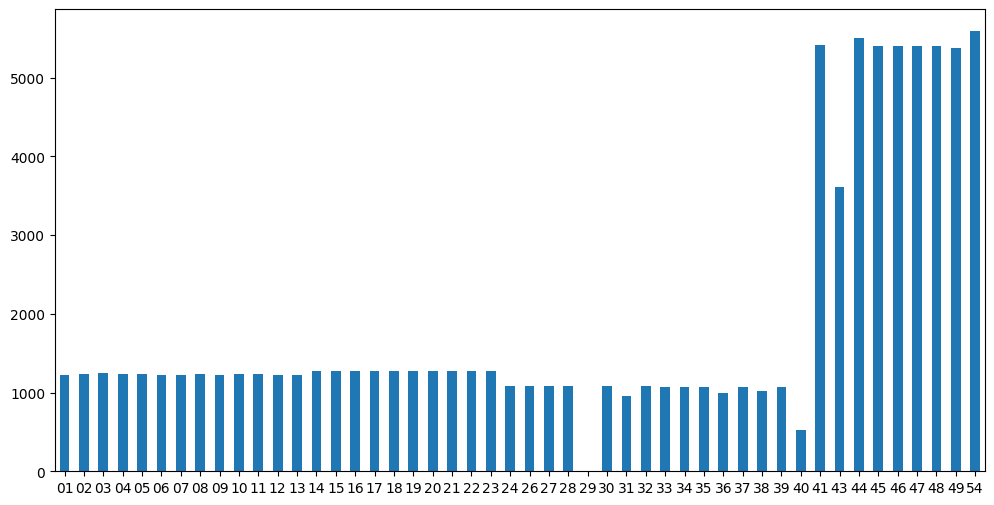

In [6]:
file_names['some_id'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), rot=0)

## Barplot of the date occurances (red when swarming happened)

<AxesSubplot: xlabel='date'>

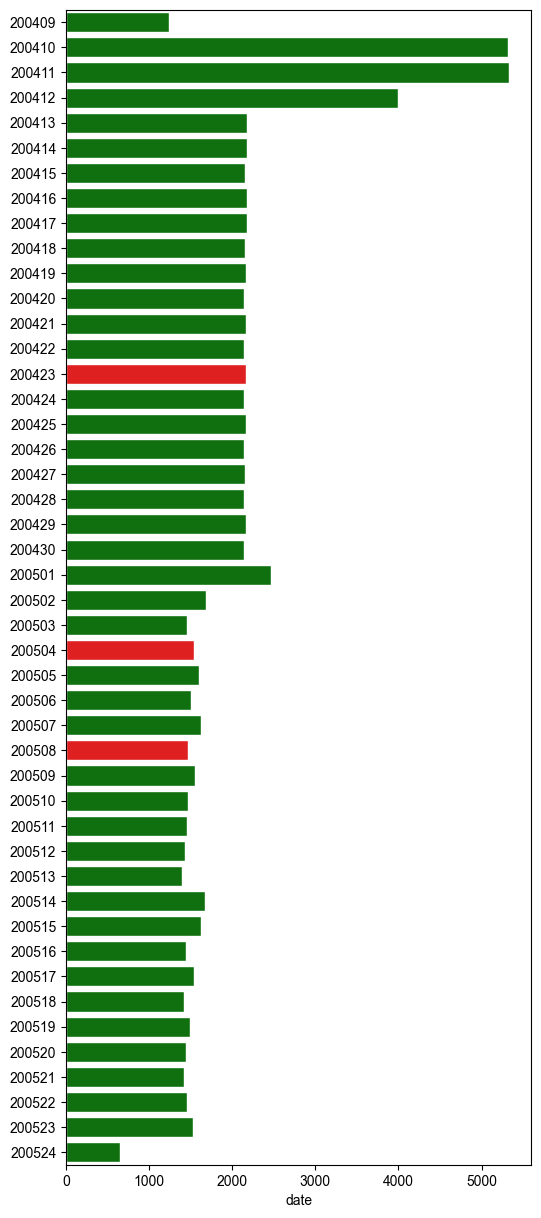

In [7]:
f, ax = plt.subplots(figsize=(6, 15))
sns.set(style='whitegrid')

date_counts = pd.DataFrame(file_names['date'].value_counts().sort_index())

cols = ['red' if ((x == '200423') | (x == '200504') | (x == '200508')) else 'green' for x in date_counts.index]

sns.barplot(x=date_counts['date'], y=date_counts.index, palette=cols)


## Value counts of times

In [8]:
file_names['time'].value_counts().sort_index()

000010     8
000029     9
000105     8
000119    14
000132     9
          ..
235916     8
235921     4
235923     8
235928    15
235945     9
Name: time, Length: 7630, dtype: int64

# Searching for the swarming times

- 2020. 04. 23. 13:34 - Hive ID 35 - Mic ID 24
- 2020. 05. 04. 14:37 - Hive ID 22 - Mic ID 33
- 2020. 05. 08. 18:57 - Hive ID 36 - Mic ID 15

In [9]:
file_names[(file_names['date'].str.contains('200423')) & (file_names['time'].str.startswith('1334'))]

,File,date,time,some_id


We don't have exactly 2020 04 23 13:34 :(

In [10]:
file_names[(file_names['date'].str.contains('200423')) & (file_names['time'].str.startswith('133'))]

,File,date,time,some_id
12682,__200423-133136-54.pcm,200423,133136,54
12683,__200423-133136-41.pcm,200423,133136,41
12684,__200423-133136-45.pcm,200423,133136,45
12685,__200423-133136-44.pcm,200423,133136,44
12686,__200423-133136-46.pcm,200423,133136,46
12687,__200423-133136-47.pcm,200423,133136,47
12688,__200423-133136-49.pcm,200423,133136,49
12689,__200423-133136-48.pcm,200423,133136,48


In [11]:
file_names[(file_names['date'].str.contains('200504')) & (file_names['time'].str.startswith('1437'))]

,File,date,time,some_id


In [12]:
file_names[(file_names['date'].str.contains('200504')) & (file_names['time'].str.startswith('143'))]

,File,date,time,some_id
87358,__200504-143253-48.pcm,200504,143253,48
87359,__200504-143253-49.pcm,200504,143253,49
87360,__200504-143253-47.pcm,200504,143253,47
87361,__200504-143253-46.pcm,200504,143253,46
87362,__200504-143253-44.pcm,200504,143253,44
87363,__200504-143253-45.pcm,200504,143253,45
87364,__200504-143253-41.pcm,200504,143253,41
87365,__200504-143253-54.pcm,200504,143253,54
87366,__200504-143253-43.pcm,200504,143253,43


In [13]:
file_names[(file_names['date'].str.contains('200504')) & (file_names['time'].str.startswith('144'))]

,File,date,time,some_id
75875,__200504-144506-48.pcm,200504,144506,48
75876,__200504-144506-49.pcm,200504,144506,49
75877,__200504-144506-47.pcm,200504,144506,47
75878,__200504-144506-46.pcm,200504,144506,46
75879,__200504-144506-44.pcm,200504,144506,44
75880,__200504-144506-45.pcm,200504,144506,45
75881,__200504-144506-41.pcm,200504,144506,41
75882,__200504-144506-54.pcm,200504,144506,54
75883,__200504-144506-43.pcm,200504,144506,43


In [14]:
file_names[(file_names['date'].str.contains('200508')) & (file_names['time'].str.startswith('185'))]

,File,date,time,some_id
68492,__200508-185650-49.pcm,200508,185650,49
68493,__200508-185650-48.pcm,200508,185650,48
68494,__200508-185650-46.pcm,200508,185650,46
68495,__200508-185650-47.pcm,200508,185650,47
68496,__200508-185650-45.pcm,200508,185650,45
68497,__200508-185650-44.pcm,200508,185650,44
68498,__200508-185650-54.pcm,200508,185650,54
68499,__200508-185650-41.pcm,200508,185650,41
68500,__200508-185650-43.pcm,200508,185650,43


# Summary

Seeing no special case for the number at the end of the filenames. ('some_id') Don't think it's the hive or mic ID.

We don't have audio data at the swarming times. I need to think about a fitness function in the consciousness of this.